In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import seaborn as sns
import bybit

C:\Users\aldan\AppData\Local\Programs\Python\Python39\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
#Create an array of random numbers
data = np.random.randn(1000)
data

#Load the Data
titanic_data = sns.load_dataset("titanic")
tips_data = sns.load_dataset("tips")

tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


TYPES OF PLOTS

0.03228653540528742

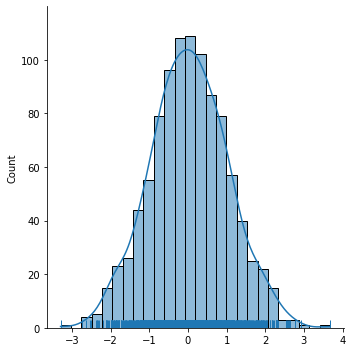

In [3]:
#Regular plot
sns.displot(data, kde=True, rug=True)
np.mean(data)

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

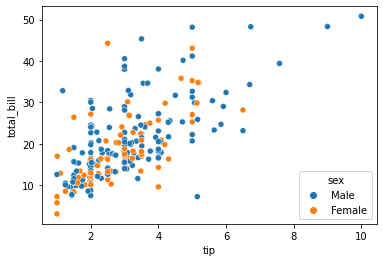

In [4]:
#Scatter plot
sns.scatterplot(y=tips_data["total_bill"], x=tips_data["tip"], hue=tips_data["sex"])

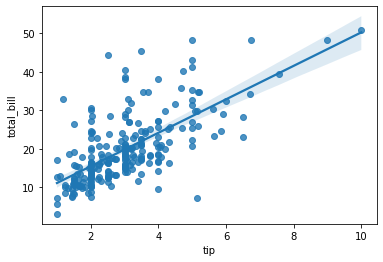

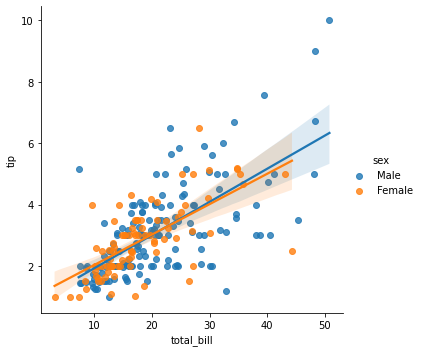

In [5]:
#Regression Line
sns.regplot(y=tips_data["total_bill"], x=tips_data["tip"])

#Double Regression Line
sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips_data)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

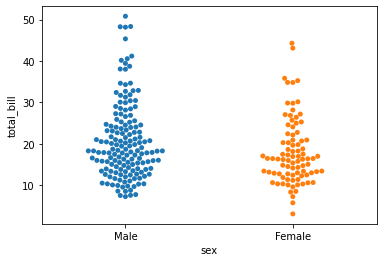

In [6]:
#Categorical Plot
sns.swarmplot(y=tips_data['total_bill'], x=tips_data['sex'])

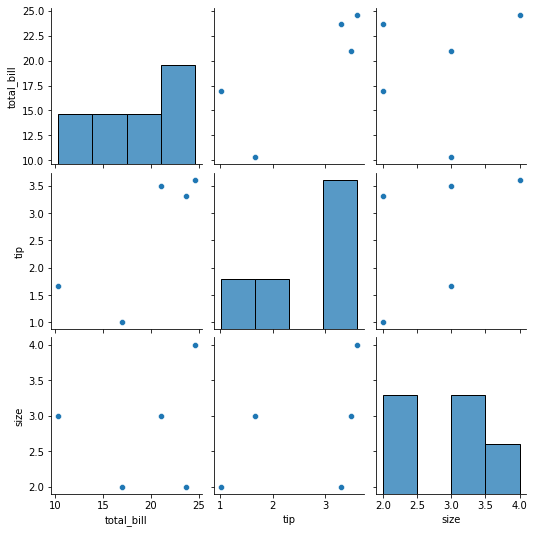

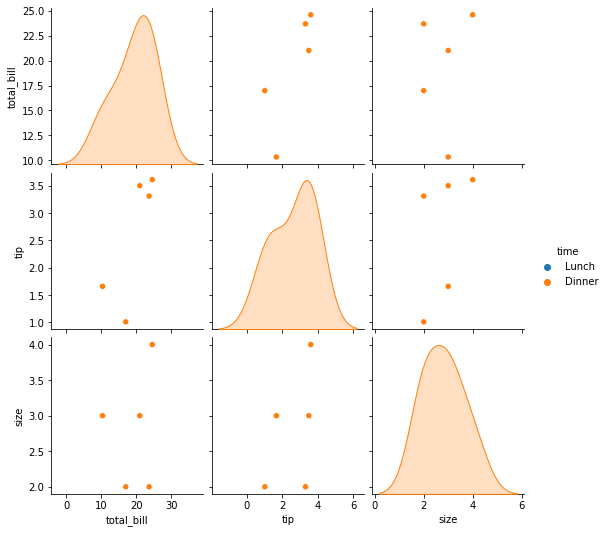

In [7]:
#All Columns plotted separately
sns.pairplot( data = tips_data.head())

#All Columns plotted separately then divided by "hue"
sns.pairplot( data = tips_data.head(), hue = "time")

<AxesSubplot:xlabel='tip'>

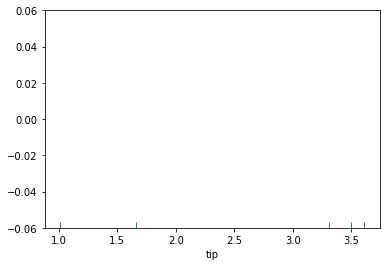

In [8]:
#Small Bars Plot
sns.rugplot(tips_data.head()["tip"]) 

<AxesSubplot:xlabel='pclass', ylabel='age'>

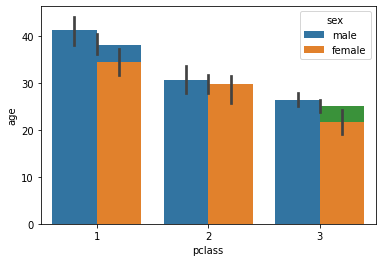

In [9]:
#Finds the average between a numerical and a non-numerical column
sns.barplot(x="pclass", y="age", data = titanic_data)

#Finds the average between a numerical and a non-numerical column and then, divide the columns by "hue"
sns.barplot(x="pclass", y="age", hue="sex", data = titanic_data)

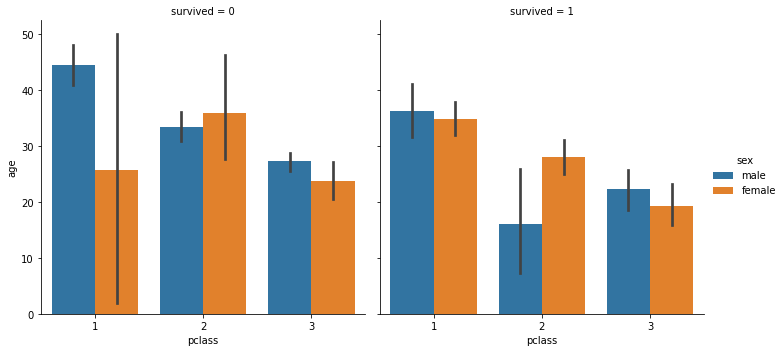

In [10]:
#Finds the average between a numerical and a non-numerical column, divide the columns by "hue", Two plots defined by "col"
sns.catplot(x="pclass", y="age", hue="sex", col = "survived", data = titanic_data, kind = "bar")

<AxesSubplot:xlabel='sex', ylabel='age'>

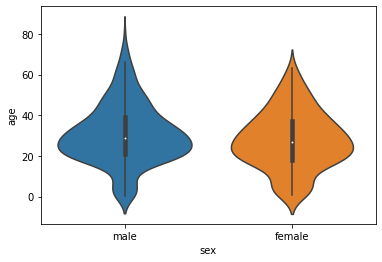

In [11]:
#Violin Plot
sns.violinplot(x="sex", y="age", data=titanic_data)

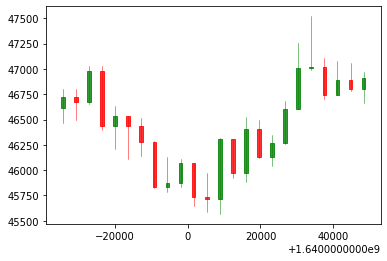

<Figure size 432x288 with 0 Axes>

In [12]:
#BTC Candlestick Plot
client = bybit.bybit(test=False, api_key="", api_secret="")

def time_now():
    return int(float(pd.DataFrame.from_dict(client.Common.Common_getTime().result()[0], orient = "index")[0]["time_now"]))

def kline(interval, mins_ago, symbol = "BTCUSD"):
        return pd.DataFrame.from_dict(client.Kline.Kline_get(symbol=symbol, interval=str(interval), **{'from':float(int(float(time_now()) - float(mins_ago*60)))}).result()[0]["result"]) 

df = kline(60, 1440)
df[["open", "high", "low", "close"]] = df[["open", "high", "low", "close"]].astype(float)
df = df.drop(["interval","symbol","volume","turnover"], axis=1)  

fig, ax = plt.subplots()
candlestick_ohlc(ax, df.values, width=1000, colorup = "green", colordown = "red", alpha = 0.8)
plt.show()
plt.clf()

Text(0.5, 1.0, 'Heat')

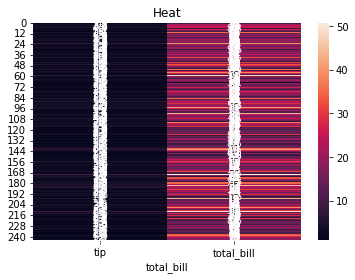

In [13]:
#Heatmap
sns.heatmap(data=tips_data[["tip","total_bill"]], annot=True) #annot=True - This ensures that the values for each cell appear on the chart.
plt.xlabel("total_bill")
plt.title("Heat")

<AxesSubplot:xlabel='tip', ylabel='Density'>

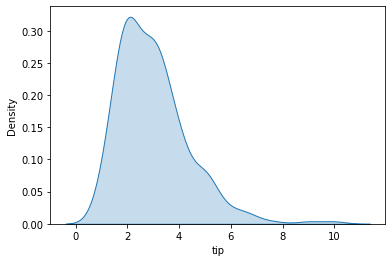

In [14]:
#Density Plot
sns.kdeplot(data=tips_data['tip'], shade=True)

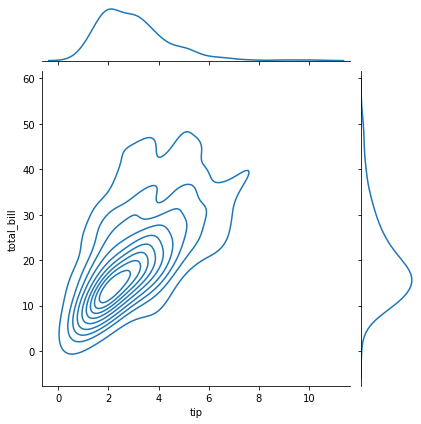

In [15]:
#Combining 2 Plots
sns.jointplot(x=tips_data['tip'], y=tips_data['total_bill'], kind="kde")  #Top curve is KDE X-axis, Right curve is KDE Y-axis

<AxesSubplot:xlabel='tip', ylabel='Density'>

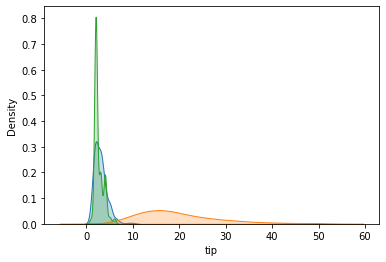

In [16]:
#Combining 2 or More Plots
sns.kdeplot(data=tips_data['tip'], label="Tip", shade = True)
sns.kdeplot(data=tips_data['total_bill'], label="Total Bill", shade = True)
sns.kdeplot(data=tips_data['size'], label="Size", shade = True)

CUSTOMIZING THE PLOTS

In [17]:
plt.rcParams["figure.figsize"] = [10,8] #Size of the plot

sns.set_style("darkgrid")